### ИУ5-61Б Павловская А.А. РК2 ТМО

In [384]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка и первичный анализ данных

In [414]:
data = pd.read_csv('archive/states_all.csv')

In [415]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [416]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1715


In [417]:
i = 0
for i in range(500,1715):
    data.drop(axis = 0,index = i, inplace = True)

In [418]:
data.shape

(500, 25)

In [419]:
# Список колонок с типами данных
data.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [420]:
# Проверка наличия пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

PRIMARY_KEY - 0
STATE - 0
YEAR - 0
ENROLL - 51
TOTAL_REVENUE - 0
FEDERAL_REVENUE - 0
STATE_REVENUE - 0
LOCAL_REVENUE - 0
TOTAL_EXPENDITURE - 0
INSTRUCTION_EXPENDITURE - 0
SUPPORT_SERVICES_EXPENDITURE - 0
OTHER_EXPENDITURE - 51
CAPITAL_OUTLAY_EXPENDITURE - 0
GRADES_PK_G - 9
GRADES_KG_G - 0
GRADES_4_G - 0
GRADES_8_G - 0
GRADES_12_G - 0
GRADES_1_8_G - 255
GRADES_9_12_G - 255
GRADES_ALL_G - 0
AVG_MATH_4_SCORE - 417
AVG_MATH_8_SCORE - 418
AVG_READING_4_SCORE - 378
AVG_READING_8_SCORE - 463


In [421]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [422]:
# Кодирование категориального признака STATE целочисленными значениями
le = LabelEncoder()
le.fit(data.STATE) 
data.STATE = le.transform(data.STATE)

In [423]:
data.drop(['YEAR','PRIMARY_KEY','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE',
           'AVG_READING_8_SCORE','GRADES_1_8_G','GRADES_9_12_G'], axis = 1, inplace = True)
data.drop(['ENROLL','OTHER_EXPENDITURE'], axis = 1, inplace = True)

In [424]:
data.head()

,STATE,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_ALL_G
0,0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,731634.0
1,1,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,122487.0
2,2,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,673477.0
3,3,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,441490.0
4,4,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,5254844.0


In [425]:
data.dtypes

STATE                             int32
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_ALL_G                    float64
dtype: object

In [426]:
# Проверка наличия пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

STATE - 0
TOTAL_REVENUE - 0
FEDERAL_REVENUE - 0
STATE_REVENUE - 0
LOCAL_REVENUE - 0
TOTAL_EXPENDITURE - 0
INSTRUCTION_EXPENDITURE - 0
SUPPORT_SERVICES_EXPENDITURE - 0
CAPITAL_OUTLAY_EXPENDITURE - 0
GRADES_PK_G - 9
GRADES_KG_G - 0
GRADES_4_G - 0
GRADES_8_G - 0
GRADES_12_G - 0
GRADES_ALL_G - 0


In [427]:
from sklearn.impute import SimpleImputer

In [428]:
# Обработка пропусков GRADES_PK_G
imp_num = SimpleImputer(strategy='median')
data[['GRADES_PK_G']] = imp_num.fit_transform(data[['GRADES_PK_G']])

In [429]:
# Проверка наличия пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

STATE - 0
TOTAL_REVENUE - 0
FEDERAL_REVENUE - 0
STATE_REVENUE - 0
LOCAL_REVENUE - 0
TOTAL_EXPENDITURE - 0
INSTRUCTION_EXPENDITURE - 0
SUPPORT_SERVICES_EXPENDITURE - 0
CAPITAL_OUTLAY_EXPENDITURE - 0
GRADES_PK_G - 0
GRADES_KG_G - 0
GRADES_4_G - 0
GRADES_8_G - 0
GRADES_12_G - 0
GRADES_ALL_G - 0


In [430]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         500 non-null    int32  
 1   TOTAL_REVENUE                 500 non-null    float64
 2   FEDERAL_REVENUE               500 non-null    float64
 3   STATE_REVENUE                 500 non-null    float64
 4   LOCAL_REVENUE                 500 non-null    float64
 5   TOTAL_EXPENDITURE             500 non-null    float64
 6   INSTRUCTION_EXPENDITURE       500 non-null    float64
 7   SUPPORT_SERVICES_EXPENDITURE  500 non-null    float64
 8   CAPITAL_OUTLAY_EXPENDITURE    500 non-null    float64
 9   GRADES_PK_G                   500 non-null    float64
 10  GRADES_KG_G                   500 non-null    float64
 11  GRADES_4_G                    500 non-null    float64
 12  GRADES_8_G                    500 non-null    float64
 13  GRADE

<AxesSubplot:>

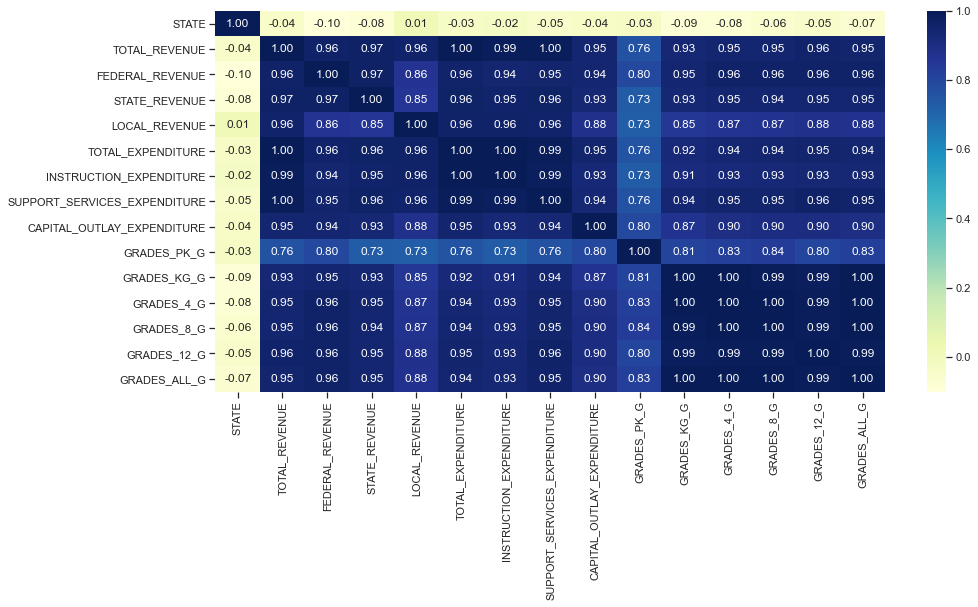

In [431]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'),cmap='YlGnBu', ax=ax, annot=True, fmt='.2f')

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='STATE_REVENUE'>

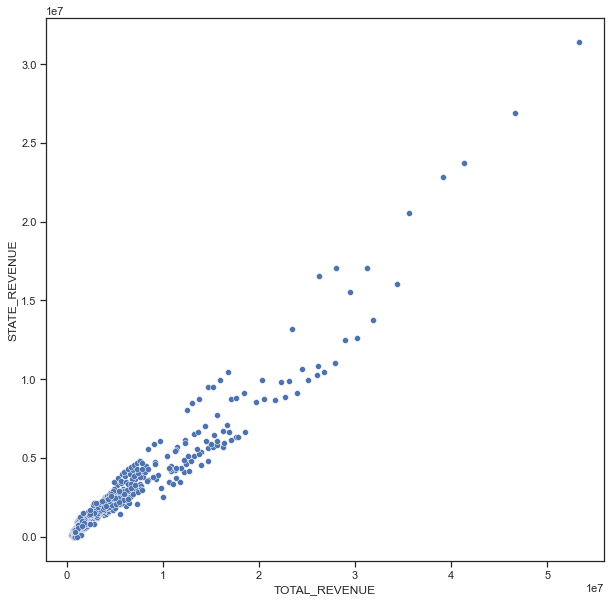

In [432]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='TOTAL_REVENUE', y='STATE_REVENUE', data=data)

Между признаком "STATE_REVENUE" и целевым признаком "TOTAL_REVENUE" практически линейная зависимость, коэффициент корреляции = 0,97

### Разделение выборки на обучающую и тестовую

In [433]:
X = data.drop(['TOTAL_REVENUE'], axis = 1)
Y = data.TOTAL_REVENUE
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    STATE  FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0      0         304177.0      1659028.0       715680.0          2653798.0   
1      1         106780.0       720711.0       222100.0           972488.0   
2      2         297888.0      1369815.0      1590376.0          3401580.0   
3      3         178571.0       958785.0       574603.0          1743022.0   
4      4        2072470.0     16546514.0      7641041.0         27138832.0   

   INSTRUCTION_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
0                1481703.0                      735036.0   
1                 498362.0                      350902.0   
2                1435908.0                     1007732.0   
3                 964323.0                      483488.0   
4               14358922.0                     8520926.0   

   CAPITAL_OUTLAY_EXPENDITURE  GRADES_PK_G  GRADES_KG_G  GRADES_4_G  \
0                    174053.0       8224.0      55460.0     57948.0   
1         

In [434]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      STATE  FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
363      6         208565.0      2074271.0      3177377.0          5269517.0   
170     17         312742.0      2218928.0       977003.0          3415870.0   
343     37         245664.0      2205951.0      1440476.0          3939722.0   
144     42         341912.0      1694595.0      1499391.0          3661470.0   
132     30         293378.0      3102722.0      3561798.0          6765105.0   

     INSTRUCTION_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
363                3016240.0                     1535406.0   
170                1890546.0                     1112902.0   
343                2067377.0                     1304874.0   
144                2101003.0                      996094.0   
132                3522248.0                     2430560.0   

     CAPITAL_OUTLAY_EXPENDITURE  GRADES_PK_G  GRADES_KG_G  GRADES_4_G  \
363                    300611.0   

### Линейная регрессия

In [435]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score

In [436]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, lr_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, lr_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test, lr_y_pred))
print('Метрика R^2 или коэффициент детерминации:',    r2_score(Y_test, lr_y_pred))

Средняя абсолютная ошибка: 0.03957310483558103
Средняя квадратичная ошибка: 0.0030714979717134674
Median absolute error: 0.03123405040241778
Метрика R^2 или коэффициент детерминации: 0.9999999999999999


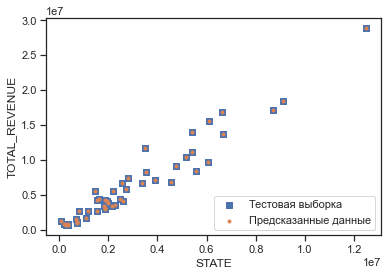

In [437]:
plt.scatter(X_test.STATE_REVENUE, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.STATE_REVENUE, lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('STATE')
plt.ylabel ('TOTAL_REVENUE')
plt.show()

### Случайный лес

In [438]:
from sklearn.ensemble import RandomForestRegressor

In [439]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [440]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Метрика R^2 или коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 63256.036000000015
Средняя квадратичная ошибка: 10002755562.736818
Median absolute error: 41488.89999999991
Метрика R^2 или коэффициент детерминации: 0.9996965948469705


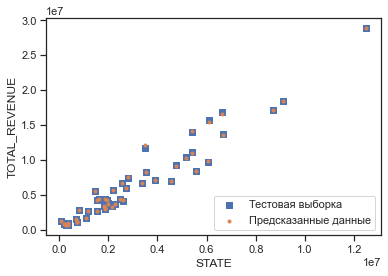

In [441]:
plt.scatter(X_test.STATE_REVENUE, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.STATE_REVENUE, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('STATE')
plt.ylabel('TOTAL_REVENUE')
plt.show()